In [1]:
import pandas as pd

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_excel("BDVigas_Paper_v32.xlsx",sheet_name="Sheet1")
df

,b (mm),fc (MPa),Mu (Kn.m),p_opt,R_opt,d_opt (cm),As (cm^2)
0,200,21,100,0.013743,0.457251,34.081476,9.367775
1,200,28,100,29591.796695,0.002230,0.166210,98368.841669
2,200,35,100,51299.129552,0.001561,0.116344,119367.089855
3,200,21,100,12423.438454,0.003977,0.296433,73654.441548
4,200,28,100,29591.796695,0.002230,0.166210,98368.841669
...,...,...,...,...,...,...,...
359995,400,28,2000,29591.796695,0.002230,0.525601,622139.180934
359996,400,35,2000,51299.129552,0.001561,0.367913,754943.763212
359997,400,21,2000,12423.438454,0.003977,0.937405,465831.590158
359998,400,28,2000,29591.796695,0.002230,0.525601,622139.180934


In [4]:
y = df["d_opt (cm)"]
x = df[["b (mm)", "fc (MPa)","Mu (Kn.m)"]]

In [5]:
y

0         34.081476
1          0.166210
2          0.116344
3          0.296433
4          0.166210
            ...    
359995     0.525601
359996     0.367913
359997     0.937405
359998     0.525601
359999     0.367913
Name: d_opt (cm), Length: 360000, dtype: float64

In [6]:
x

,b (mm),fc (MPa),Mu (Kn.m)
0,200,21,100
1,200,28,100
2,200,35,100
3,200,21,100
4,200,28,100
...,...,...,...
359995,400,28,2000
359996,400,35,2000
359997,400,21,2000
359998,400,28,2000


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=1)

In [9]:
xtrain

,b (mm),fc (MPa),Mu (Kn.m)
38851,200,28,300
202132,325,28,1200
133525,275,28,800
339880,400,28,1900
137309,275,35,800
...,...,...,...
117583,250,28,700
73349,225,35,500
312201,375,21,1800
267336,350,21,1500


In [10]:
ytrain

38851     0.287884
202132    0.451669
133525    0.400913
339880    0.512293
137309    0.280633
            ...   
117583    0.393324
73349     0.245275
312201    0.918465
267336    0.867868
128037    0.715024
Name: d_opt (cm), Length: 288000, dtype: float64

In [11]:
import tensorflow as tf

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense( 40, activation = "relu", input_shape=(xtrain.shape[1],) ),
    tf.keras.layers.Dense( 40, activation = "relu"),
    tf.keras.layers.Dense( 40, activation = "relu"),
    tf.keras.layers.Dense( 40, activation = "relu"),
    tf.keras.layers.Dense( 40, activation = "relu"),
    tf.keras.layers.Dense( 1 )
])

c:\Users\josga\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 40)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,761 (26.41 KB)

 Trainable params: 6,761 (26.41 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
def RMSE(y_true,y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [15]:
# Compilar el modelo
model.compile(optimizer="adam",
    loss=RMSE
)

In [16]:
# Entrenando el modelo
model.fit(xtrain, ytrain, epochs = 20, verbose = True)

Epoch 1/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.8594
Epoch 2/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.0289
Epoch 3/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.0140
Epoch 4/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0135
Epoch 5/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.0058
Epoch 6/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0044
Epoch 7/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0043
Epoch 8/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0065
Epoch 9/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0039
Epoch 10/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.0062
Epoch 11/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0072
Epoch 12/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0083
Epoch 13/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.0060
Epoch 14/20
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.0042
Epoch 15/20
900

  31/9000 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step  

<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\c'
C:\Users\josga\AppData\Local\Temp\ipykernel_20244\4179346108.py:24: SyntaxWarning: invalid escape sequence '\c'
  plt.text(15, 7, f'$y = {m[0]:.2f} \cdot x + {b[0]:.2f}$', fontsize=10)


9000/9000 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
MSE: 0.003968536397345656
RMSE: 0.06299632050640463


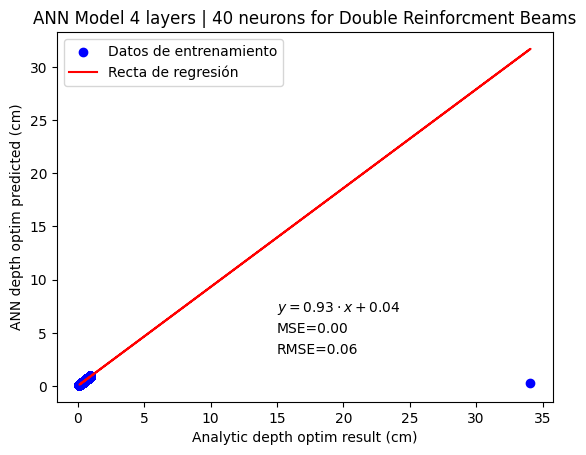

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Calculamos las predicciones del modelo
y_pred = model.predict(xtrain)

# Calculamos el MSE
mse = mean_squared_error(ytrain, y_pred)
print("MSE:", mse)

# Calculamos el RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytrain, y_pred, 1)

# Ploteo de resultados
plt.scatter(ytrain, y_pred, color='blue', label='Datos de entrenamiento')
plt.plot(ytrain, m*ytrain + b, color='red', label='Recta de regresión')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(15, 7, f'$y = {m[0]:.2f} \cdot x + {b[0]:.2f}$', fontsize=10)
plt.text(15, 5, f'MSE={mse:.2f}', fontsize=10)
plt.text(15, 3, f'RMSE={rmse:.2f}', fontsize=10)

plt.xlabel("Analytic depth optim result (cm)")
plt.ylabel("ANN depth optim predicted (cm)")
plt.title("ANN Model 4 layers | 40 neurons for Double Reinforcment Beams")
plt.legend()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1ed348a2450>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed5b3077a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed5b3070b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ed5b307da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ed5842eab0>],
 'means': []}

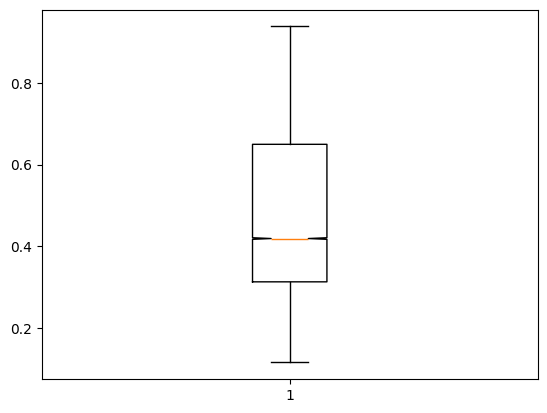

In [18]:
plt.boxplot(ytest,"o")

In [19]:
#Datos de ETABS
b = [550] #Base de la Viga (mm)
fc = [31] #Resistencia a la compresión del concreto (MPa)
Mu = [2500] #Momento Último (kN.m)

#Almacenamiento de datos del ETABS
data_Etabs = pd.DataFrame()
data_Etabs['b (mm)'] = b
data_Etabs['fc (MPa)'] = fc
data_Etabs['Mu (Kn.m)'] = Mu

#Evaluación en el Modelo entrenado por ANN
y_d = model.predict(data_Etabs)

imprimir = f"El peralte efectivo (d) es {y_d} cm"
print(imprimir)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
El peralte efectivo (d) es [[0.50161374]] cm
